In [51]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from scipy.stats import norm

In [34]:
def t_score(sam_size, sam_mean, pop_mean, std):
    numerator = sam_mean - pop_mean
    denomenator = std / sam_size**0.5
    return numerator / denomenator

# **Understanding the Hypothesis Testing**

Null Hypothesis (Status Quo): $ H_1 \ \Rightarrow \ \gt, \ \lt, \ \neq $

Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

**Step - 2:**

Collect a sample of size n
Compute the mean from this sample $ \bar{x} $

**Step - 3:** Compute Test Statistic:

If population variance is known$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

If population variance is unknown$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

**Step - 4:** Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

**Step - 5:** Apply decision rule:

**If test statistic is z-score -**

Two tailed z-test:$$ |z| \gt z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$

Right tailed z-test:$$ z \gt z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Left tailed z-test:$$ z \lt -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


**If test statistic is t-score**

Two tailed t-test:$$ |t| \gt t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Right tailed t-test:$$ t \gt t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Left tailed t-test:$$ t \lt t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


**Step - 6:** Compute p-value  $ P(Test \ Statistics | H_0) $

For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value \lt \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

## 1) Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

Step-1:\ Alternate Hypothesis (Bold Claim):$$H_{1}: \mu\neq 500$$Null Hypothesis (Status Quo):$$H_{0}: \mu = 500$$

Step-2:

Collect a sample size n=10$$[490,220,470,500,495,496,496,498,508,480]$$
Compute the sample mean$$\overline{x}=465.3$$
Step-3: Compute Test statistics$$t=\frac{\overline{x}-\mu}{s/\sqrt{n}}$$

Step-4: Decide $\alpha$ or significance level= $0.95$

Step-5:Two tailed t-statistics$$reject \ H_{0} \ if \\ |t| \gt;t_{n-1,\frac{\alpha}{2}}$$

Step-6: Compute p-value

In [40]:
import math

sam_size = 10
l = [490,220,470,500,495,496,496,498,508,480]
pop_mean = 500
sam_mean = 465.3

std = 0
for i in range(0,sam_size):
    data = (((l[i])**2)-((sam_mean)**2))/(sam_size-1)
    std = std + data
print(math.sqrt(std))

86.8485911099183


In [41]:
# calculating t_score
t = t_score(sam_size, sam_mean, pop_mean, 86.84)

print(t)

-1.2636001244569637


In [44]:
# Two tail t_critical

alpha = 1 - 0.95

t_critical = t.ppf(1-(alpha/2), df = 9)

print(t_critical)

2.2621571627409915


Text(465.3, 0.0007, 'x_bar')

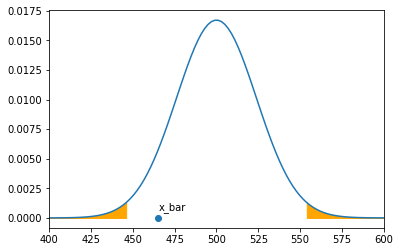

In [49]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = std / sam_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sam_mean, 0)
plt.annotate("x_bar", (sam_mean, 0.0007))



In [53]:
if (np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Fail to reject Null Hypothesis


In [ ]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20637358891012125
Fail to reject Null Hypothesis


## Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

Step-1:\ Alternate Hypothesis (Bold Claim):$$H_{1}: \mu \gt 4$$Null Hypothesis (Status Quo):$$H_{0}: \mu  \leq 4$$

Step-2:

Collect a sample size n=20$$[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]$$
Compute the sample mean$$\overline{x}=4.25$$
Step-3: Compute Test statistics$$t=\frac{\overline{x}-\mu}{s/\sqrt{n}}$$

Step-4: Decide $\alpha$ or significance level= $0.95$

Step-5.1:Rigth tailed t-statistics$$reject \ H_{0} \ if \\ t\gt t_{n-1,\alpha}$$

In [ ]:
import math

sam_size = 20
l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
pop_mean = 4
sam_mean = 4.25

std = 0
for i in range(0,sam_size):
    data = (((l[i])**2)-((sam_mean)**2))/(sam_size-1)
    std = std + data
print(math.sqrt(std))

0.8506963092234007


In [ ]:
# calculating t_score
t = t_score(sam_size, sam_mean, pop_mean, std)

print(t)

1.5449196935453096


In [ ]:
# One tail
from scipy.stats import t
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)


1.729132811521367


Text(4.25, 7e-06, 'x_bar')

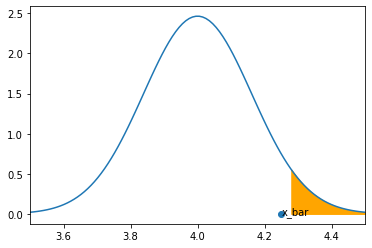

In [ ]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = std / sam_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_right = pop_mean + (t_critical * std)




# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sam_mean, 0)
plt.annotate("x_bar", (sam_mean, 0.000007))




In [ ]:
if (t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Fail to reject Null Hypothesis


In [ ]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.06118284464282242
Fail to reject Null Hypothesis


## Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step-1:\ Alternate Hypothesis (Bold Claim):$$H_{1}: \mu \gt 15$$Null Hypothesis (Status Quo):$$H_{0}: \mu  \leq 15$$

Step-2:

Collect a sample size n=20 $$[14.8,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.4,15.46,13.88,14.31,14.41,15.7,15.38]$$
Compute the sample mean$$\overline{x}=15.130499999999998$$
Step-3: Compute Test statistics$$t=\frac{\overline{x}-\mu}{s/\sqrt{n}}$$

Step-4: Decide $\alpha$ or significance level= $0.95$

Step-5:Rigth tailed t-statistics$$reject \ H_{0} \ if \\ t\gt t_{n-1,\alpha}$$Step-6: Compute p-value

In [35]:
import math

sam_size = 20
l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
pop_mean = 15
sam_mean = 15.1

std = 0
for i in range(0,sam_size):
    data = (((l[i])**2)-((sam_mean)**2))/(sam_size-1)
    std = std + data
print(math.sqrt(std))

1.00974723257072


In [36]:
# calculating t_score
t = t_score(sam_size, sam_mean, pop_mean, std)

print(t)

0.4386212363334587


In [39]:
# One tail
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


Text(15.1, 0.1, 'x_bar')

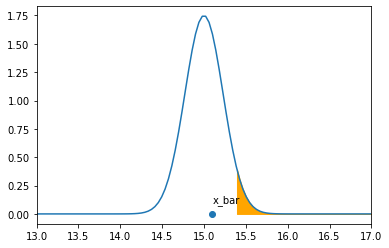

In [ ]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = std / sam_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sam_mean, 0)
plt.annotate("x_bar", (sam_mean, 0.1))



In [ ]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [54]:
p_value = 1.0 - norm.cdf(np.abs(t))


if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis



Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

Step-1:\ Alternate Hypothesis (Bold Claim):$$H_{1}: \mu \lt 100$$Null Hypothesis (Status Quo):$$H_{0}: \mu  \geq 100$$

Step-2:

Collect a sample size n=100
Compute the sample mean$$\overline{x}=97.5$$
Step-3: Compute Test statistics$$t=\frac{\overline{x}-\mu}{s/\sqrt{n}}$$

Step-4: Decide $\alpha$ or significance level= $0.99$

Step-5.1:Rigth tailed t-statistics$$reject \ H_{0} \ if \\ t\lt t_{n-1,\alpha}$$Step-5.2: Compute p-value

In [55]:
sam_size = 100
std = 7          #here i have taken the value directly
pop_mean = 100
sam_mean = 97.5  #here i have taken the value directly

In [56]:
# calculating t_score
t = t_score(sam_size, sam_mean, pop_mean, std)

print(t)

-3.5714285714285716


In [57]:
# One tail
from scipy.stats import t
alpha = 1 - 0.99

t_critical = t.ppf(1-alpha, df = 99)

print(t_critical)

2.3646058614359737


Text(97.5, 0.02, 'x_bar')

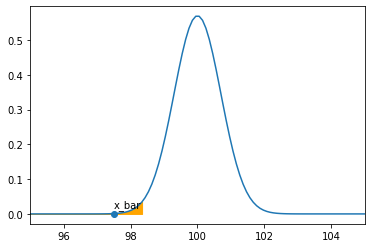

In [58]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 95
x_max = 105


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = std / sam_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sam_mean, 0)
plt.annotate("x_bar", (sam_mean, 0.02))



In [ ]:

if (t < t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [60]:
p_value = 1.0 - norm.cdf(np.abs(t))

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis
